Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0014
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.8600e-04
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.4579e-04
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3428e-04
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.1105e-04
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.0518e-04
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.0668e-04
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 9.8266e-05
Epoch 9/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 8.7800e-05
Epoch 10/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.0222e-04
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0066
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 2.5503e-04
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 2.0979e-04
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 1.9290e-04
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - loss: 1.7585e-04
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 1.5613e-04
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 1.5024e-04
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 1.3160e-04
Epoch 9/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 1.2627e-04
Epoch 10/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.3425e-04
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


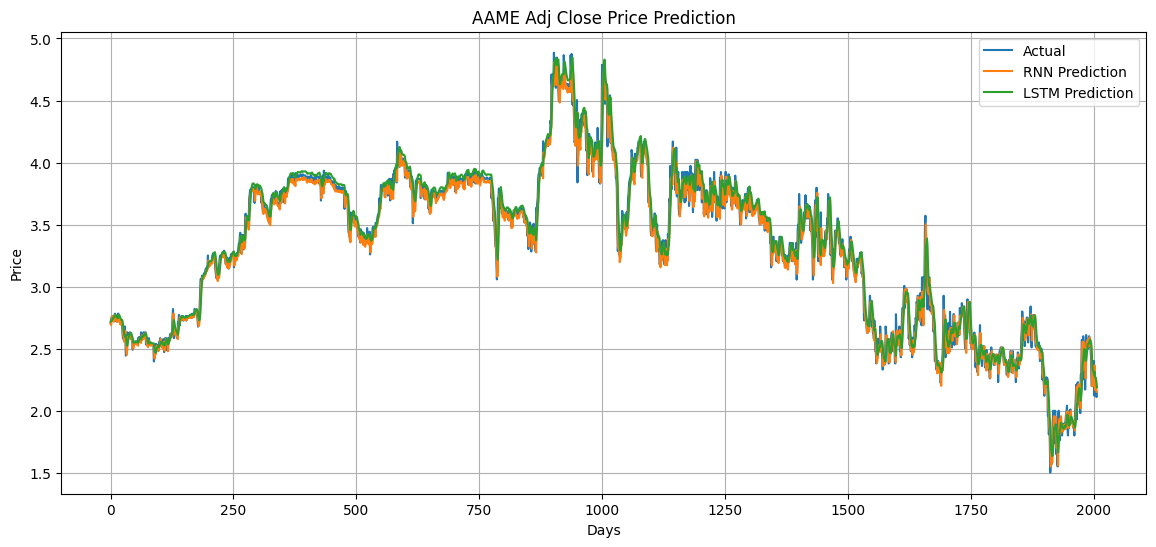

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

# 데이터 불러오기
df = pd.read_csv("/content/AAME.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
adj_close = df[['Adj Close']].values

# 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(adj_close)

# 시퀀스 생성 함수
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# 시퀀스 및 데이터 분할
window_size = 60
X, y = create_sequences(scaled_data, window_size)
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# RNN 모델
rnn_model = Sequential([
    SimpleRNN(50, input_shape=(window_size, 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

rnn_pred = rnn_model.predict(X_test)
rnn_pred_rescaled = scaler.inverse_transform(rnn_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# LSTM 모델
lstm_model = Sequential([
    LSTM(50, input_shape=(window_size, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

lstm_pred = lstm_model.predict(X_test)
lstm_pred_rescaled = scaler.inverse_transform(lstm_pred)

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(rnn_pred_rescaled, label='RNN Prediction')
plt.plot(lstm_pred_rescaled, label='LSTM Prediction')
plt.title('AAME Adj Close Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
